Valid for ping 0.28.1 (10/01/2025)

### Load data

In [1]:
%matplotlib widget

import numpy as np
import themachinethatgoesping as pingmachine
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

# data folder
folder = r'C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD'

# list raw data files
files = pingmachine.echosounders.index_functions.find_files(folder,['.all','.wcd'])
files.sort()

# create the file handler
index_files = pingmachine.echosounders.index_functions.get_index_paths(files)
fileHandler = pingmachine.echosounders.kongsbergall.KongsbergAllFileHandler(files,index_files,init=True)

# get pings that contain WCD
pings = pingmachine.pingprocessing.filter_pings.by_features(fileHandler.get_pings(),['watercolumn.amplitudes'])

# check data with the WCI Viewer
viewer = pingmachine.pingprocessing.widgets.WCIViewer(pings)

Found 8 files
indexing files ⢀ 99% :00s<00m:00s] [Found: 7463 datagrams in 8 files (258MB)]                                          
Initializing ping interface ⡀ 75% :00s<00m:00s] [Done]                                              


### Get WCI

num across-track-distance steps: 512, num down-distance steps: 270


Text(0.5, 1.0, 'first ping WCD, wedge view')

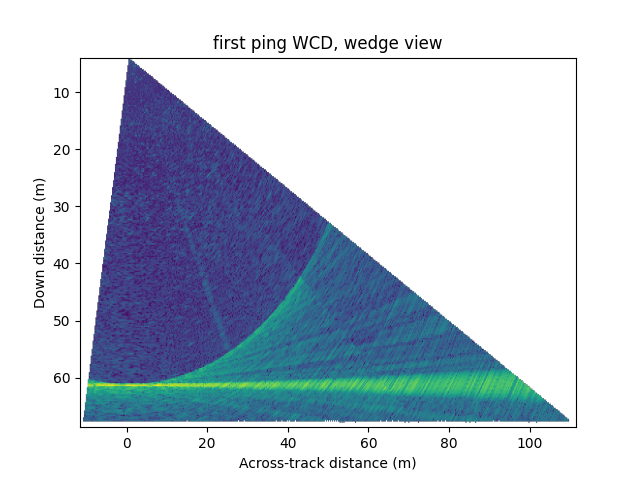

In [2]:
# to get a wedge view for a ping, use the make_wci function
image, extent = pingmachine.pingprocessing.watercolumn.image.make_wci(pings[0],512) # specify num steps in acrosstrack distance
# output is an across-track-distance x down-distance numpy array
print(f"num across-track-distance steps: {np.shape(image)[0]}, num down-distance steps: {np.shape(image)[1]}")

# display
fig1,ax1 = pingmachine.pingprocessing.core.create_figure('wci1')
ax1.imshow(image.transpose(), extent=extent, aspect='auto') # we transpose the image for display purposes
ax1.set_xlabel('Across-track distance (m)')
ax1.set_ylabel('Down distance (m)')
ax1.set_title('first ping WCD, wedge view')

In [3]:
# get down and across-track resolution from extent
down_res = (extent[3]-extent[2])/np.shape(image)[1]
across_res = (extent[1]-extent[0])/np.shape(image)[0]

print(f"Down resolution: {down_res} m, Across resolution: {across_res} m")

Down resolution: -0.23959369287914564 m, Across resolution: 0.24033572978936063 m


### WCI data subselection
#### Example 1: Using ping sample selector

Text(0.5, 1.0, 'first ping WCD, wedge view, selected beams')

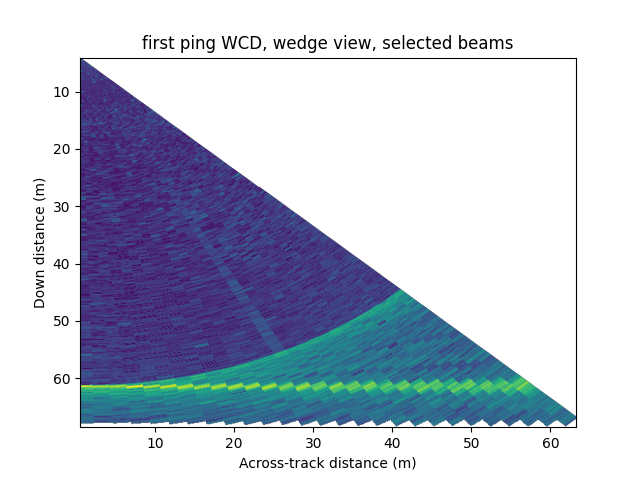

In [4]:
# We can specify the data we want, using a pingsampleselector 
pss = pingmachine.echosounders.pingtools.PingSampleSelector()
pss.select_beam_range_by_angles(-45,0,5) # min angle, max angle, stepsize in degrees. Other selection options are available

# apply the ping selector for wedge view
image_pss,extent_pss = pingmachine.pingprocessing.watercolumn.image.make_wci(pings[0],512,ping_sample_selector=pss)

# display
fig2,ax2 = pingmachine.pingprocessing.core.create_figure('wci2')
ax2.imshow(image_pss.transpose(), extent=extent_pss, aspect='auto') # we transpose the image for display purposes
ax2.set_xlabel('Across-track distance (m)')
ax2.set_ylabel('Down distance (m)')
ax2.set_title('first ping WCD, wedge view, selected beams')

### Example 2: Specifying output min max


Text(0.5, 1.0, 'first ping WCD, wedge view, selected beams (color), selected extent (autumn)')

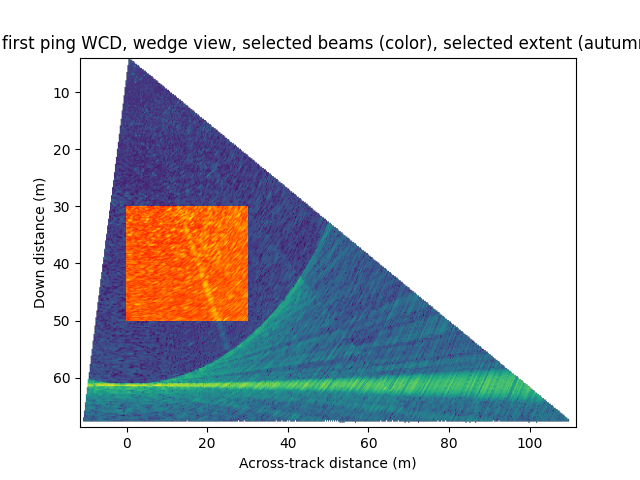

In [5]:
# besides the sample selector, we can also specify the y and z coordinates of the output wedge view
image_minmax,extent_minmax = pingmachine.pingprocessing.watercolumn.image.make_wci(pings[0],512,hmin=0,hmax=30,vmin=30,vmax=50)

# first display full data
fig3,ax3 = pingmachine.pingprocessing.core.create_figure('wci3')
ax3.imshow(image.transpose(), extent=extent, aspect='auto') # full data
xlim = ax3.get_xlim()
ylim = ax3.get_ylim()

# add image of selected ontop of the same plot
ax3.imshow(image_minmax.transpose(), extent=extent_minmax, aspect='auto', cmap='autumn') # selected data
ax3.set_xlim(xlim)
ax3.set_ylim(ylim)
ax3.set_xlabel('Across-track distance (m)')
ax3.set_ylabel('Down distance (m)')
ax3.set_title('first ping WCD, wedge view, selected beams (color), selected extent (autumn)')

### Example 3: Specifying YZ coordinates

Text(0.5, 1.0, 'first ping WCD, wedge view, selected beams (color), selected extent (gray)')

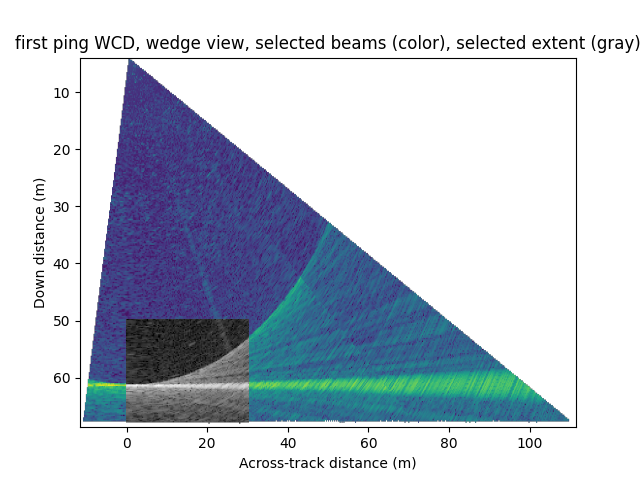

In [6]:
# besides the sample selector, we can also specify the y and z coordinates of the output wedge view
image_yz,extent_yz = pingmachine.pingprocessing.watercolumn.image.make_wci(pings[0],512,y_coordinates=np.linspace(0,30,100),z_coordinates=np.linspace(50,70,100))

# first display full data
fig4,ax4 = pingmachine.pingprocessing.core.create_figure('wci4')
ax4.imshow(image.transpose(), extent=extent, aspect='auto') # full data
xlim = ax4.get_xlim()
ylim = ax4.get_ylim()

# add image2 ontop of the same plot
ax4.imshow(image_yz.transpose(), extent=extent_yz, aspect='auto', cmap='gray') # selected data
ax4.set_xlim(xlim)
ax4.set_ylim(ylim)
ax4.set_xlabel('Across-track distance (m)')
ax4.set_ylabel('Down distance (m)')
ax4.set_title('first ping WCD, wedge view, selected beams (color), selected extent (gray)')